### 2021.10.25

### query

In [56]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt

In [5]:
np.random.seed(1)
df=pd.DataFrame(np.random.normal(size=(15,4)),columns=list('ABCD'))
df

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
6,0.900856,-0.683728,-0.122890,-0.935769
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044


#### A>0 and B<0인 행을 선택

`-` 방법1

In [6]:
df.query('A>0 & B<0')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255


`-` 방법2

In [7]:
df.query('A>0 and B<0')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255


#### A<B<C인 행을 선택

In [8]:
df.query('A<B<C')

,A,B,C,D
9,-1.117310,0.234416,1.659802,0.742044
13,-1.142518,-0.349343,-0.208894,0.586623


#### A>mean(A)인 행을 선택

`-` 방법1

In [9]:
df.A.mean()

-0.018839420539994597

In [10]:
df.query('A>-0.018839420539994597')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250
14,0.838983,0.931102,0.285587,0.885141


`-` 방법2

In [11]:
meanA=df.A.mean()
meanA

-0.018839420539994597

In [12]:
#df.query('A> meanA') 에러난다 -> 데이터프레임 안에 있는 정보가 아니므로.

In [13]:
df.query('A> @meanA') #@사용하면 외부 정보사용 가능

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250
14,0.838983,0.931102,0.285587,0.885141


#### A>mean(A)이고, A<0.8 인것을 선택

`-` 방법1

In [14]:
df.query(' A> @meanA and A<0.8')

,A,B,C,D
2,0.319039,-0.249370,1.462108,-2.060141
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250


`-` 방법2

In [15]:
df.query(' A> @meanA'
         ' and A<0.8')

,A,B,C,D
2,0.319039,-0.249370,1.462108,-2.060141
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250


`-` 참고사항 : 아래는 에러가 발생한다.

In [16]:
#df.query('A> @meanA'
        # 'and A<0.8') => 실행이 안된다.

In [17]:
'A> @meanA''and A<0.8' #컴퓨터 인식에 의한 오류

'A> @meanAand A<0.8'

In [18]:
'A> @meanA'' and A<0.8' 

'A> @meanA and A<0.8'

#### 단순인덱싱

In [19]:
df

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
6,0.900856,-0.683728,-0.122890,-0.935769
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044


`-` 0, 3:5, 9:11에 해당하는 row를 뽑고싶다. $\to$ 칼럼이름을 'index'로 받아서 사용한다.

In [20]:
df.iloc[[0,3,4,5,9,10,11]]

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
9,-1.117310,0.234416,1.659802,0.742044
10,-0.191836,-0.887629,-0.747158,1.692455
11,0.050808,-0.636996,0.190915,2.100255


In [21]:
df.query('index==0 or 3<=index <=5 or 9<=index<=11')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
9,-1.117310,0.234416,1.659802,0.742044
10,-0.191836,-0.887629,-0.747158,1.692455
11,0.050808,-0.636996,0.190915,2.100255


`-` 응용사례1

In [22]:
df.query('index==0 or index==[8,9,10]')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044
10,-0.191836,-0.887629,-0.747158,1.692455


`-` 응용사례2

In [23]:
i1 = np.arange(3)
i1

array([0, 1, 2])

In [24]:
df.query('index==5 or index in @i1')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
5,-1.100619,1.144724,0.901591,0.502494


`-` 시계열자료에서 특히 유융함

In [25]:
df2 = pd.DataFrame(np.random.normal(size=(10,4)),columns=list('ABCD'), index=pd.date_range('20201226',periods=10))
df2

,A,B,C,D
2020-12-26,-0.754398,1.252868,0.512930,-0.298093
2020-12-27,0.488518,-0.075572,1.131629,1.519817
2020-12-28,2.185575,-1.396496,-1.444114,-0.504466
2020-12-29,0.160037,0.876169,0.315635,-2.022201
2020-12-30,-0.306204,0.827975,0.230095,0.762011
2020-12-31,-0.222328,-0.200758,0.186561,0.410052
2021-01-01,0.198300,0.119009,-0.670662,0.377564
2021-01-02,0.121821,1.129484,1.198918,0.185156
2021-01-03,-0.375285,-0.638730,0.423494,0.077340
2021-01-04,-0.343854,0.043597,-0.620001,0.698032


In [26]:
df2.query(
    '"2020-12-27"< index <= "2021-01-03"') #모두 ''사용시 안됐음

,A,B,C,D
2020-12-28,2.185575,-1.396496,-1.444114,-0.504466
2020-12-29,0.160037,0.876169,0.315635,-2.022201
2020-12-30,-0.306204,0.827975,0.230095,0.762011
2020-12-31,-0.222328,-0.200758,0.186561,0.410052
2021-01-01,0.198300,0.119009,-0.670662,0.377564
2021-01-02,0.121821,1.129484,1.198918,0.185156
2021-01-03,-0.375285,-0.638730,0.423494,0.077340


In [27]:
df2.query(
    '"2020-12-27"< index <= "2021-01-03"'
    ' and A+B<C') #모두 ''사용시 안됐음

,A,B,C,D
2020-12-31,-0.222328,-0.200758,0.186561,0.410052
2021-01-03,-0.375285,-0.638730,0.423494,0.077340


### FIFA 선수들 시각화

#### FIFA data

`-` FIFA22라는 축구 게임이 있음(굉장히 인기있음)

`-` 게임에 실제 선수들이 나오면서 선수들의 능력치가 세밀하게 구현되어 있음

`-` 이 능력치에 대한 데이터셋이 캐글에 공개되어 있음

### Data

In [28]:
fifa22=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

In [29]:
fifa22.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


`-` Overall을 기준으로 정렬하여 보자.

In [30]:
fifa22.sort_values(by='Overall',ascending=False) #인덱스가 엉망이다.

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0
33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0
14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,18.0,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,29.0,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15593,235352,18 T. Käßemodel,28,https://cdn.sofifa.com/players/235/352/18_60.png,Germany,https://cdn.sofifa.com/flags/de.png,46,46,FC Erzgebirge Aue,https://cdn.sofifa.com/teams/506/30.png,...,38.0,10.0,12.0,6.0,13.0,6.0,CM,45.0,€47K,NaN
15685,219735,15 T. Fletcher,19,https://cdn.sofifa.com/players/219/735/15_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,46,52,Wycombe Wanderers,https://cdn.sofifa.com/teams/1933/30.png,...,50.0,14.0,7.0,8.0,14.0,11.0,CB,46.0,NaN,NaN
16572,19334,10 I. Baraclough,38,https://cdn.sofifa.com/players/019/334/10_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,44,65,NaN,https://cdn.sofifa.com/flags/gb-eng.png,...,NaN,5.0,20.0,46.0,20.0,20.0,CM,46.0,NaN,NaN
15999,220806,16 E. Redman,18,https://cdn.sofifa.com/players/220/806/16_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,44,57,Newport County,https://cdn.sofifa.com/teams/112254/30.png,...,38.0,13.0,7.0,16.0,9.0,7.0,CB,44.0,NaN,NaN


In [31]:
fifa22.sort_values(by='Overall',ascending=False).reset_index()

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,18.0,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,29.0,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15593,235352,18 T. Käßemodel,28,https://cdn.sofifa.com/players/235/352/18_60.png,Germany,https://cdn.sofifa.com/flags/de.png,46,46,FC Erzgebirge Aue,...,38.0,10.0,12.0,6.0,13.0,6.0,CM,45.0,€47K,NaN
16706,15685,219735,15 T. Fletcher,19,https://cdn.sofifa.com/players/219/735/15_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,46,52,Wycombe Wanderers,...,50.0,14.0,7.0,8.0,14.0,11.0,CB,46.0,NaN,NaN
16707,16572,19334,10 I. Baraclough,38,https://cdn.sofifa.com/players/019/334/10_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,44,65,NaN,...,NaN,5.0,20.0,46.0,20.0,20.0,CM,46.0,NaN,NaN
16708,15999,220806,16 E. Redman,18,https://cdn.sofifa.com/players/220/806/16_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,44,57,Newport County,...,38.0,13.0,7.0,16.0,9.0,7.0,CB,44.0,NaN,NaN


In [32]:
fifa22.sort_values(by='Overall',ascending=False).reset_index().rename(columns={'index':'index_old'}) #good

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,18.0,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,29.0,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15593,235352,18 T. Käßemodel,28,https://cdn.sofifa.com/players/235/352/18_60.png,Germany,https://cdn.sofifa.com/flags/de.png,46,46,FC Erzgebirge Aue,...,38.0,10.0,12.0,6.0,13.0,6.0,CM,45.0,€47K,NaN
16706,15685,219735,15 T. Fletcher,19,https://cdn.sofifa.com/players/219/735/15_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,46,52,Wycombe Wanderers,...,50.0,14.0,7.0,8.0,14.0,11.0,CB,46.0,NaN,NaN
16707,16572,19334,10 I. Baraclough,38,https://cdn.sofifa.com/players/019/334/10_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,44,65,NaN,...,NaN,5.0,20.0,46.0,20.0,20.0,CM,46.0,NaN,NaN
16708,15999,220806,16 E. Redman,18,https://cdn.sofifa.com/players/220/806/16_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,44,57,Newport County,...,38.0,13.0,7.0,16.0,9.0,7.0,CB,44.0,NaN,NaN


In [33]:
fifa22=fifa22.sort_values(by='Overall',ascending=False).reset_index().rename(columns={'index':'index_old'})

In [34]:
fifa22.head()

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,18.0,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,29.0,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0


### Overall vs Potential

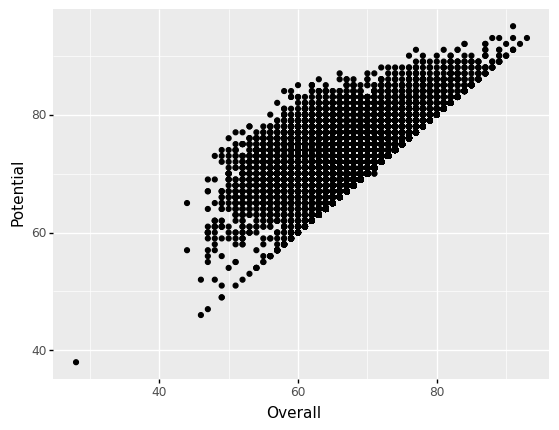

<ggplot: (8779216128142)>

In [36]:
ggplot(data=fifa22)+geom_point(aes(x='Overall',y='Potential'))

`-` 뭔가 Potential > Overall인 관계가 성립하는것 같다. $\to$ Potential2 = Potential - Overall인 변수를 새로 만들고 시각화해보자.
- 판다스: 새로운 열 추가

In [38]:
fifa22['Potential2'] = fifa22['Potential'] - fifa22['Overall']

In [39]:
fifa22

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Potential2
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0,0
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0,0
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0,2
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,0
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15593,235352,18 T. Käßemodel,28,https://cdn.sofifa.com/players/235/352/18_60.png,Germany,https://cdn.sofifa.com/flags/de.png,46,46,FC Erzgebirge Aue,...,10.0,12.0,6.0,13.0,6.0,CM,45.0,€47K,NaN,0
16706,15685,219735,15 T. Fletcher,19,https://cdn.sofifa.com/players/219/735/15_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,46,52,Wycombe Wanderers,...,14.0,7.0,8.0,14.0,11.0,CB,46.0,NaN,NaN,6
16707,16572,19334,10 I. Baraclough,38,https://cdn.sofifa.com/players/019/334/10_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,44,65,NaN,...,5.0,20.0,46.0,20.0,20.0,CM,46.0,NaN,NaN,21
16708,15999,220806,16 E. Redman,18,https://cdn.sofifa.com/players/220/806/16_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,44,57,Newport County,...,13.0,7.0,16.0,9.0,7.0,CB,44.0,NaN,NaN,13


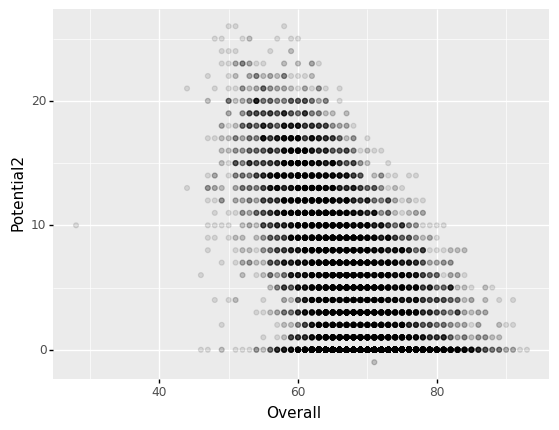

<ggplot: (8779165349596)>

In [41]:
ggplot(data=fifa22)+geom_point(aes(x='Overall',y='Potential2'),alpha=0.1)

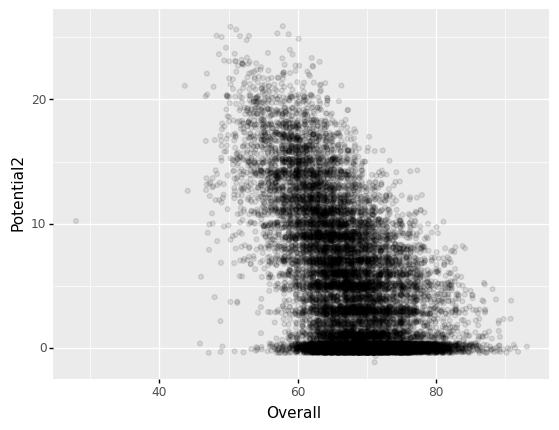

<ggplot: (8779186042742)>

In [44]:
ggplot(data=fifa22)+geom_point(aes(x='Overall',y='Potential2'),alpha=0.1,position='jitter') #jitter => 값을 흐트러뜨려 시각화 높임

`-` 포텐셜2가 너무 0근처인 선수들이 있다.(아마 은퇴한 선수로 추정) $\to$ 제외하고 그리자.

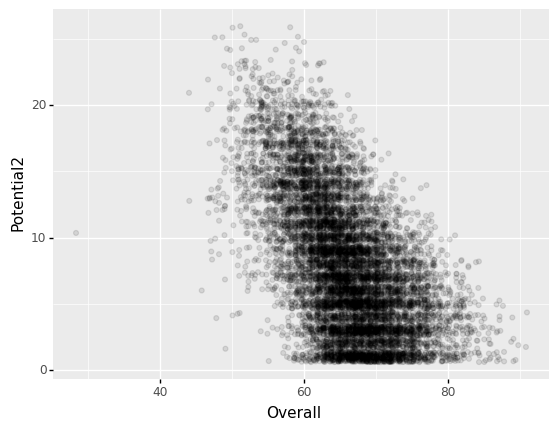

<ggplot: (8779186042185)>

In [50]:
ggplot(data=fifa22.query('Potential2>0.1'))+geom_point(aes(x='Overall',y='Potential2'),alpha=0.1,position='jitter') #jitter => 값을 흐트러뜨려 시각화 높임

In [49]:
fifa22.query('Potential2>0.1')

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Potential2
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0,2
5,82,231747,K. Mbappé,22,https://cdn.sofifa.com/players/231/747/22_60.png,France,https://cdn.sofifa.com/flags/fr.png,91,95,Paris Saint-Germain,...,13.0,5.0,7.0,11.0,6.0,ST,92.0,€373.5M,26.0,4
8,13890,192448,M. ter Stegen,29,https://cdn.sofifa.com/players/192/448/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,90,92,FC Barcelona,...,88.0,85.0,88.0,88.0,90.0,GK,90.0,€210.4M,25.0,2
14,14937,192119,T. Courtois,29,https://cdn.sofifa.com/players/192/119/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,89,91,Real Madrid CF,...,84.0,89.0,74.0,86.0,88.0,GK,89.0,€181.7M,20.0,2
15,5,212622,J. Kimmich,26,https://cdn.sofifa.com/players/212/622/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,89,90,FC Bayern München,...,8.0,15.0,7.0,15.0,15.0,CDM,89.0,€186.3M,85.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,14599,264540,E. Lalchhanchhuaha,19,https://cdn.sofifa.com/players/264/540/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,60,NorthEast United FC,...,8.0,13.0,13.0,9.0,14.0,RM,50.0,€217K,33.0,13
16706,15685,219735,15 T. Fletcher,19,https://cdn.sofifa.com/players/219/735/15_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,46,52,Wycombe Wanderers,...,14.0,7.0,8.0,14.0,11.0,CB,46.0,NaN,NaN,6
16707,16572,19334,10 I. Baraclough,38,https://cdn.sofifa.com/players/019/334/10_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,44,65,NaN,...,5.0,20.0,46.0,20.0,20.0,CM,46.0,NaN,NaN,21
16708,15999,220806,16 E. Redman,18,https://cdn.sofifa.com/players/220/806/16_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,44,57,Newport County,...,13.0,7.0,16.0,9.0,7.0,CB,44.0,NaN,NaN,13


`-` 해석
- 음의 상관관계가 있다.
- Overall이 클수록 Potential2의 분산이 작아진다.(Overall이 클수록 더 성장할 부분이 없기 때문)

`-` Overall을 구간별로 나누자: 어느정도가 적당한 구간일까?

In [53]:
fifa22.Overall.describe()

count    16710.000000
mean        67.646320
std          6.457695
min         28.000000
25%         63.000000
50%         68.000000
75%         72.000000
max         93.000000
Name: Overall, dtype: float64

<AxesSubplot:>

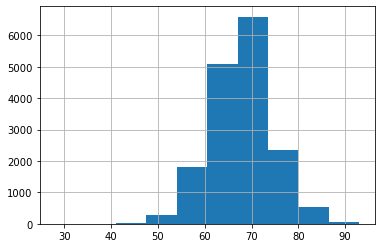

In [59]:
fifa22.Overall.hist()

In [61]:
def f(x):
    if x>72 : y='Q1'
    elif x>68 : y='Q2'
    elif x>63 : y='Q3'
    else : y='Q4'
    return y

In [76]:
fifa22['Q']=list(map(f,fifa22.Overall))
fifa22[['Q','Overall']]

,Q,Overall
0,Q1,93
1,Q1,92
2,Q1,91
3,Q1,91
4,Q1,91
...,...,...
16705,Q4,46
16706,Q4,46
16707,Q4,44
16708,Q4,44


In [77]:
fifa22

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Potential2,Q
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0,0,Q1
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0,0,Q1
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0,2,Q1
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,0,Q1
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0,0,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15593,235352,18 T. Käßemodel,28,https://cdn.sofifa.com/players/235/352/18_60.png,Germany,https://cdn.sofifa.com/flags/de.png,46,46,FC Erzgebirge Aue,...,12.0,6.0,13.0,6.0,CM,45.0,€47K,NaN,0,Q4
16706,15685,219735,15 T. Fletcher,19,https://cdn.sofifa.com/players/219/735/15_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,46,52,Wycombe Wanderers,...,7.0,8.0,14.0,11.0,CB,46.0,NaN,NaN,6,Q4
16707,16572,19334,10 I. Baraclough,38,https://cdn.sofifa.com/players/019/334/10_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,44,65,NaN,...,20.0,46.0,20.0,20.0,CM,46.0,NaN,NaN,21,Q4
16708,15999,220806,16 E. Redman,18,https://cdn.sofifa.com/players/220/806/16_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,44,57,Newport County,...,7.0,16.0,9.0,7.0,CB,44.0,NaN,NaN,13,Q4


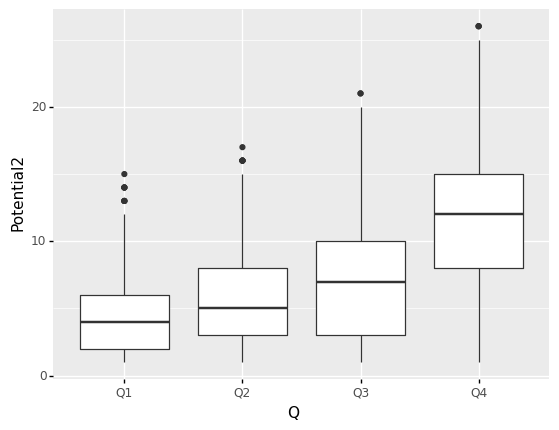

<ggplot: (8779202414535)>

In [81]:
ggplot(data=fifa22.query('Potential2>0.1'))\
+geom_boxplot(aes(x='Q',y='Potential2'))

`-` Q1으로 갈수록 분산이 작아짐! $\to$ 헷갈린다.. (사분위를 x축으로 하게되면서 산점도를 그릴때와 x축 값이 반대로 위치하며 그래프 방향또한 달라짐)

`-` 산점도와 박스플랏을 겹쳐서 그린다면 좀 더 이해가 쉬울것 같다.

`-` x축의 위치를 조정하면 될 것 같다. $\to$ Q1,Q2,Q3,Q4 각 그룹별로 x축의 위치를 구하자.(각 그룹별 평균)

In [89]:
fifa22.query('Q=="Q1"').Overall.mean()

76.3506528835691

`-` 이런식으로 해도 되지만

In [93]:
fifa22.groupby(by='Q').mean().Overall

Q
Q1    76.350653
Q2    70.411781
Q3    66.074449
Q4    59.602691
Name: Overall, dtype: float64

`-` 이제 박스플랏이 들어갈 x축의 위치를 저장할 컬럼을 추가하고 그 이름을 Qx라고 하자.

In [96]:
l=fifa22.groupby(by='Q').mean().Overall.to_list()
l

[76.3506528835691, 70.4117807472048, 66.07444942506334, 59.60269121813031]

In [98]:
def g(x):
    if x=='Q1': y=l[0]
    elif x=='Q2': y=l[1]
    elif x=='Q3': y=l[2]
    else: y=l[3]
    return y

In [103]:
fifa22['Qx']=list(map(g,fifa22.Q))
fifa22

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Potential2,Q,Qx
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,15.0,14.0,8.0,RW,93.0,€144.3M,20.0,0,Q1,76.350653
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,12.0,8.0,10.0,ST,92.0,€197.2M,35.0,0,Q1,76.350653
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,78.0,90.0,90.0,GK,91.0,€238M,27.0,2,Q1,76.350653
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,0,Q1,76.350653
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,15.0,15.0,11.0,LW,91.0,€238.7M,35.0,0,Q1,76.350653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15593,235352,18 T. Käßemodel,28,https://cdn.sofifa.com/players/235/352/18_60.png,Germany,https://cdn.sofifa.com/flags/de.png,46,46,FC Erzgebirge Aue,...,6.0,13.0,6.0,CM,45.0,€47K,NaN,0,Q4,59.602691
16706,15685,219735,15 T. Fletcher,19,https://cdn.sofifa.com/players/219/735/15_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,46,52,Wycombe Wanderers,...,8.0,14.0,11.0,CB,46.0,NaN,NaN,6,Q4,59.602691
16707,16572,19334,10 I. Baraclough,38,https://cdn.sofifa.com/players/019/334/10_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,44,65,NaN,...,46.0,20.0,20.0,CM,46.0,NaN,NaN,21,Q4,59.602691
16708,15999,220806,16 E. Redman,18,https://cdn.sofifa.com/players/220/806/16_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,44,57,Newport County,...,16.0,9.0,7.0,CB,44.0,NaN,NaN,13,Q4,59.602691


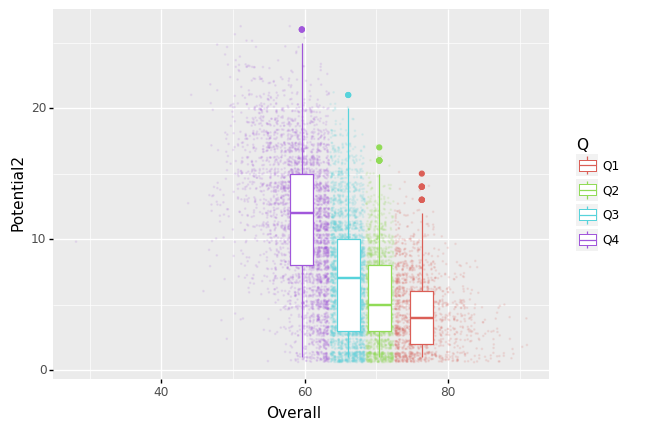

<ggplot: (8779165575388)>

In [104]:
ggplot(data=fifa22.query('Potential2>0.1'))\
+geom_point(aes(x='Overall',y='Potential2',color='Q'),alpha=0.1,size=0.1,position='jitter')\
+geom_boxplot(aes(x='Qx',y='Potential2',color='Q'))

### 숙제

fifa22 데이터셋에서 `Q==Q1`이고, `Potential2>20`인 선수들의 이름을 출력하기.